# <p style="background-color:green;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:20px 20px;"><b>Logistic Regression Project (Raisin_Class_Prediction)</b></p>

# Dataset Overview

**Data Set Information:**

https://www.researchgate.net/publication/347934123_Classification_of_Raisin_Grains_Using_Machine_Vision_and_Artificial_Intelligence_Methods

The dataset contains morphological features of **raisins**, specifically two varieties: **Kecimen** and **Besni**, grown in Turkey. It includes a total of several instances of raisin grains, each characterized by various morphological features, such as:

- **Area**: The number of pixels within the boundaries of the raisin grain.
- **MajorAxisLength**: The length of the longest line that can be drawn on the raisin grain.
- **MinorAxisLength**: The length of the shortest line that can be drawn on the raisin grain.
- **Eccentricity**: A measure of the eccentricity of the ellipse, which has the same moments as the raisin.
- **ConvexArea**: The number of pixels in the smallest convex hull that can enclose the raisin.
- **Extent**: The ratio of the area of the raisin grain to the total area of the bounding box.
- **Perimeter**: The distance around the boundary of the raisin grain.

The target variable, **Class**, represents the variety of raisin, with possible values being **Kecimen** and **Besni**.

The dataset is primarily used for classification tasks, where the goal is to predict the variety of raisin based on its morphological features using machine learning models.



# <font color='green'> <b>Exploratory Data Analysis (EDA) and Visualization</b><font color='black'>

In [42]:
# Importing libraries
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, auc, roc_curve, average_precision_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve 
from sklearn.pipeline import Pipeline
from skimpy import skim
import missingno as msno
import plotly
import plotly.express as px
import cufflinks as cf   # !pip install cufflinks

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

import warnings
warnings.filterwarnings('ignore')


plt.rcParams["figure.figsize"] = (10,6)   # default: (6.4, 4.8)
pd.set_option('display.max_columns', 500) # default: 20
pd.set_option('display.max_rows', 500)    # default: 10
pd.options.display.float_format = '{:.3f}'.format

In [43]:
# Loading dataset
df0 = pd.read_excel("Raisin_Dataset.xlsx")
df = df0.copy()

In [44]:
# Display the first 5 rows of the DataFrame
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,Kecimen
1,75166,406.691,243.032,0.802,78789,0.684,1121.786,Kecimen
2,90856,442.267,266.328,0.798,93717,0.638,1208.575,Kecimen
3,45928,286.541,208.760,0.685,47336,0.700,844.162,Kecimen
4,79408,352.191,290.828,0.564,81463,0.793,1073.251,Kecimen


In [45]:
# Provides a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [46]:
# Generates descriptive statistics of numerical columns and transposes the result
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.000,87804.128,39002.111,25387.000,59348.000,78902.000,105028.250,235047.000
MajorAxisLength,900.000,430.930,116.035,225.630,345.443,407.804,494.187,997.292
MinorAxisLength,900.000,254.488,49.989,143.711,219.111,247.848,279.889,492.275
Eccentricity,900.000,0.782,0.090,0.349,0.742,0.799,0.843,0.962
ConvexArea,900.000,91186.090,40769.290,26139.000,61513.250,81651.000,108375.750,278217.000
Extent,900.000,0.700,0.053,0.380,0.671,0.707,0.735,0.835
Perimeter,900.000,1165.907,273.764,619.074,966.411,1119.509,1308.390,2697.753


In [47]:
df.describe(include="object").T

,count,unique,top,freq
Class,900,2,Kecimen,450


In [48]:
# Generate a quick summary of the dataset, providing an overview of each column
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 900    │ │ float64     │ 5     │                                                          │
│ │ Number of columns │ 8      │ │ int64       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name       ┃ NA  ┃ NA %  ┃ mean    ┃ sd       ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ Area              │   0 │     0 │   87800 │    39000 │  25390 │  59350 │  78900 │ 105000 │ 235000 │ ▅▇▃▂▁  │  │
│ │ MajorAxisLength   │   0 │     0 │   430.9 │      116 │  225.6 │  345.4 │  407.8 │  494.2 │  997.3 │  ▅▇▃▁  │  │
│ │ MinorAxisLength   │   0 │     0 │   254.5 │    49.99 │  143.7 │  219.1 │  247.8 │  279.9 │  492.3 │  ▂▇▅▁  │  │
│ │ Eccentricity      │   0 │     0 │  0.7815 │  0.09032 │ 0.3487 │ 0.7418 │ 0.7988 │ 0.8426 │ 0.9621 │   ▁▃▇▂ │  │
│ │ ConvexArea        │   0 │     0 │   91190 │    40770 │  26140 │  61510 │  81650 │ 108400 │ 278200 │ ▆▇▃▁▁  │  │
│ │ Extent            │   0 │     0 │  0.6995 │  0.05347 │ 0.3799 │ 0.6709 │ 0.7074 │  0.735 │ 0.8355 │    ▃▇▁ │  │
│ │ Perimeter         │   0 │     0 │    1166 │    273.8 │  619.1 │  966.4 │   1120 │   1308 │   2698 │  ▃▇▃▁  │  │
│ └───────────────────┴─────┴───────┴─────────┴──────────┴────────┴────────┴────────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Class                     │       0 │          0 │                            1 │                      900 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

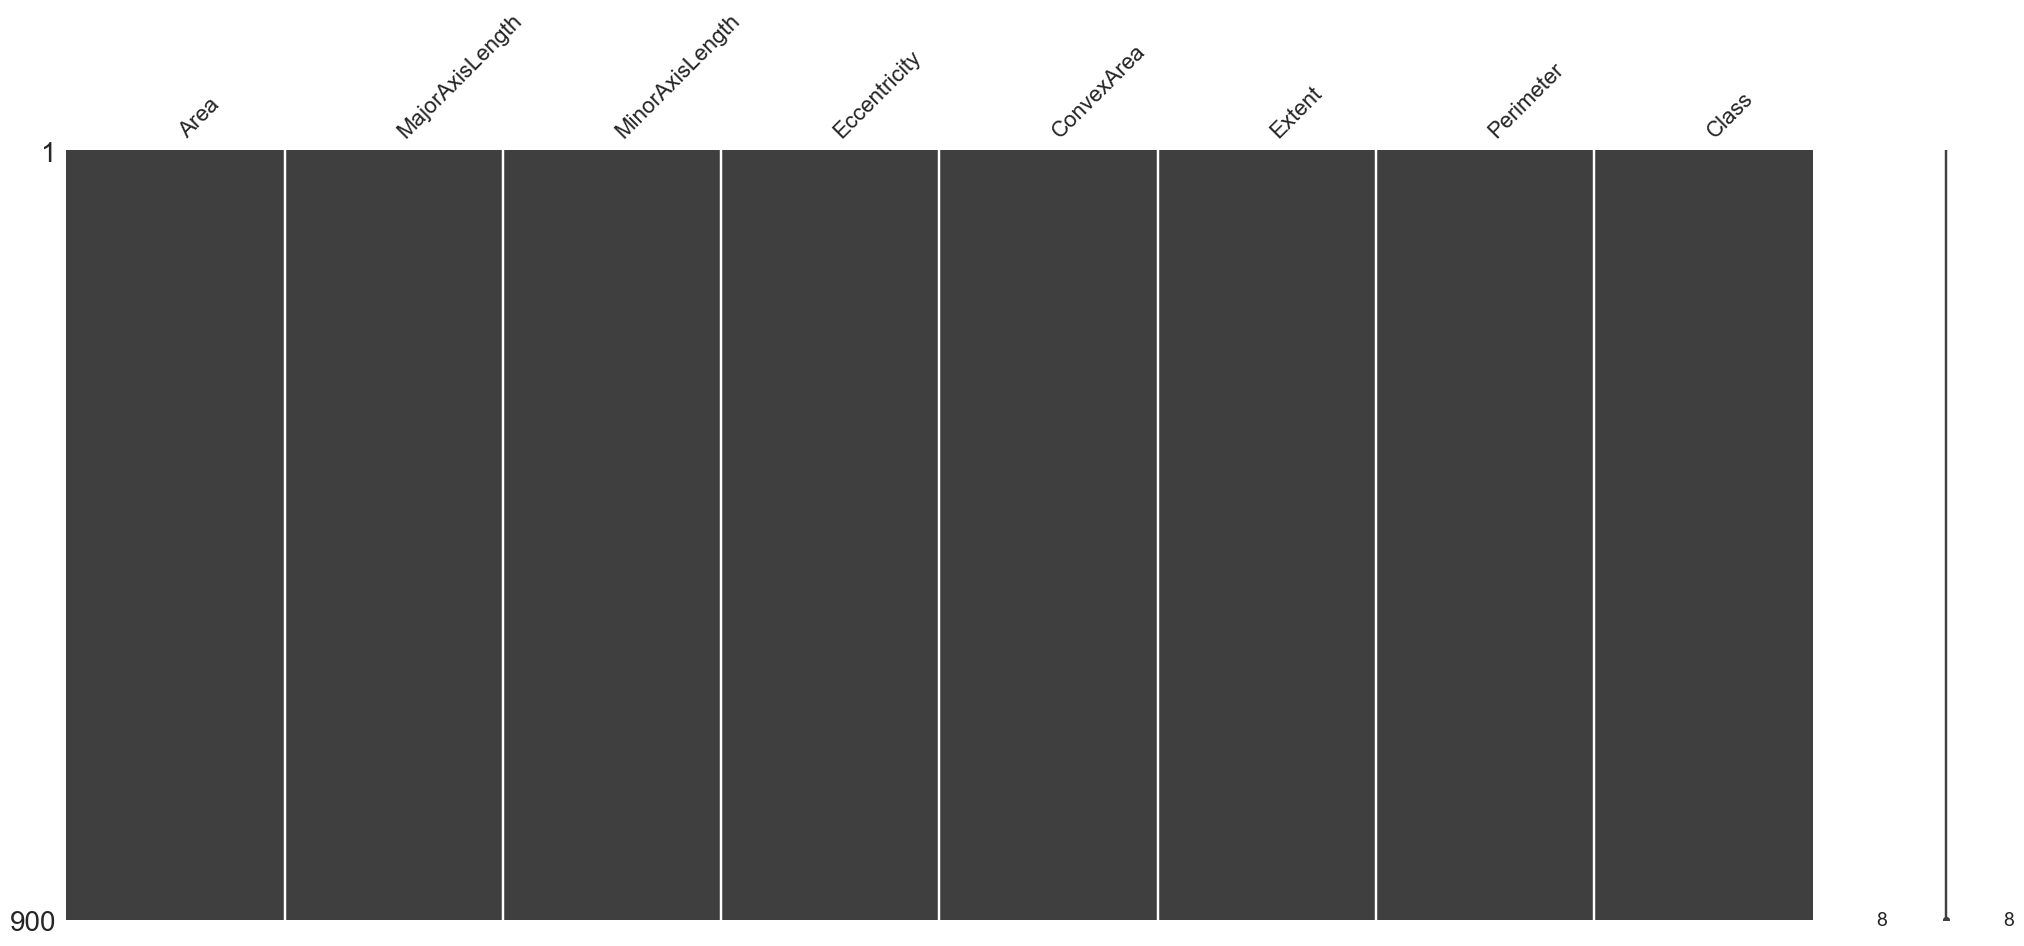

In [49]:
# Visualizes the missing values in the DataFrame using a missing value matrix from the missingno library.
import missingno as msno
msno.matrix(df);

In [50]:
df.duplicated().sum()

np.int64(0)

In [51]:
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [52]:
df.shape

(900, 8)

In [53]:
df.Class.value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

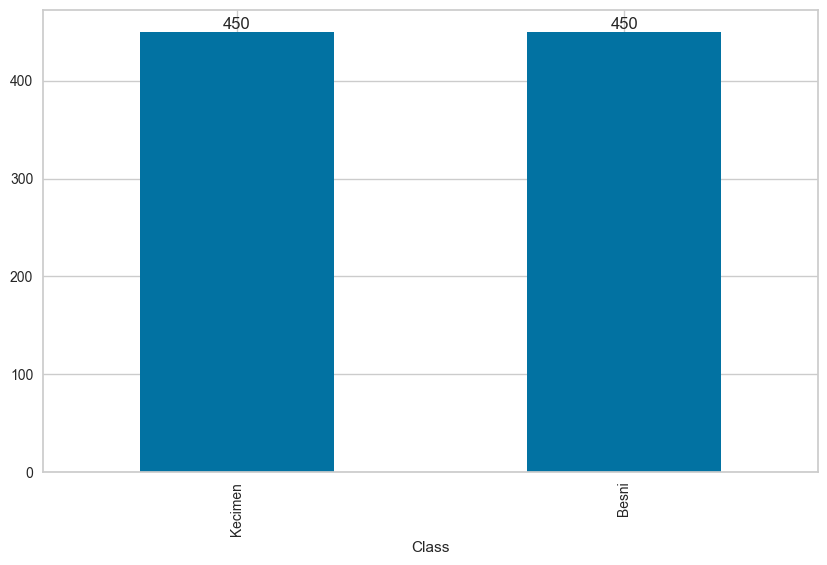

In [54]:
ax = df.Class.value_counts().plot(kind ="bar")
ax.bar_label(ax.containers[0]); 

**Balanced dataset** - is a dataset in classification problems where each class contains a similar number of examples.  
For example: Kecimen: 450 - Besni: 450

**Unbalanced/Imbalanced dataset** occurs when one class has significantly more examples compared to others.  
For example: Diabetic (1): 300 - Non-diabetic (0): 5000

In this dataset, we have an equal number of two classes. Therefore, we can use **accuracy** to evaluate the model's performance.


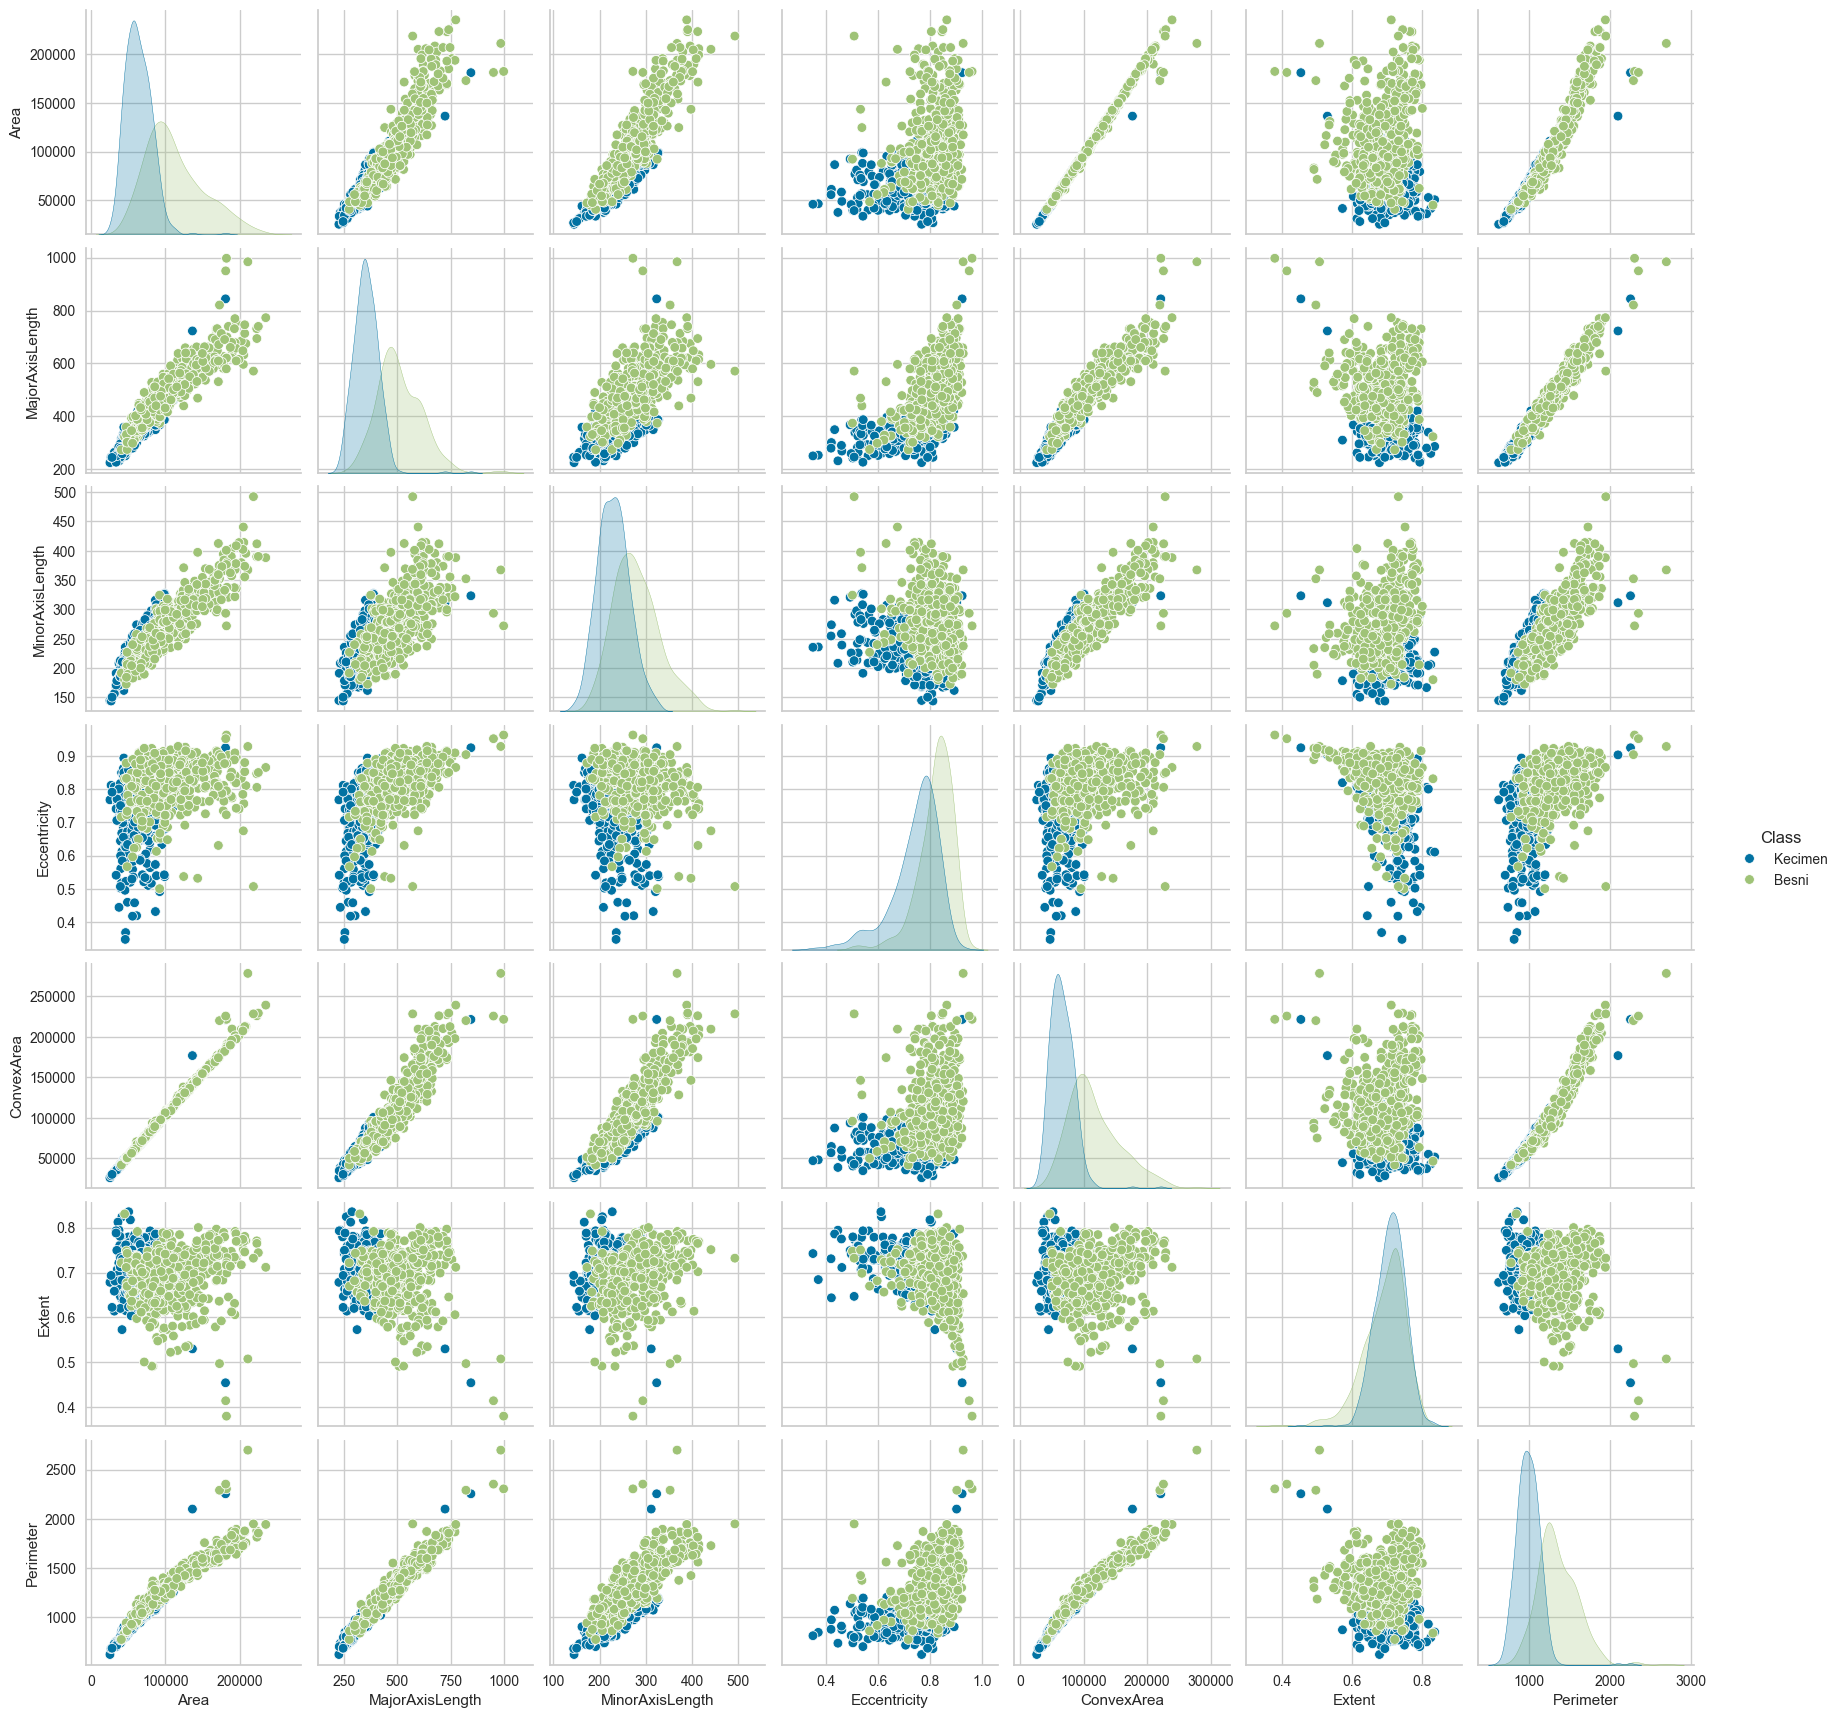

In [56]:
sns.pairplot(df, hue="Class");

In [57]:
fig = px.box(df, color="Class", color_discrete_map={"Kecimen":'#FF0000',"Besni":'#00FF00'})
fig.show()

In [58]:
df_numeric = df.select_dtypes(include=[np.number])

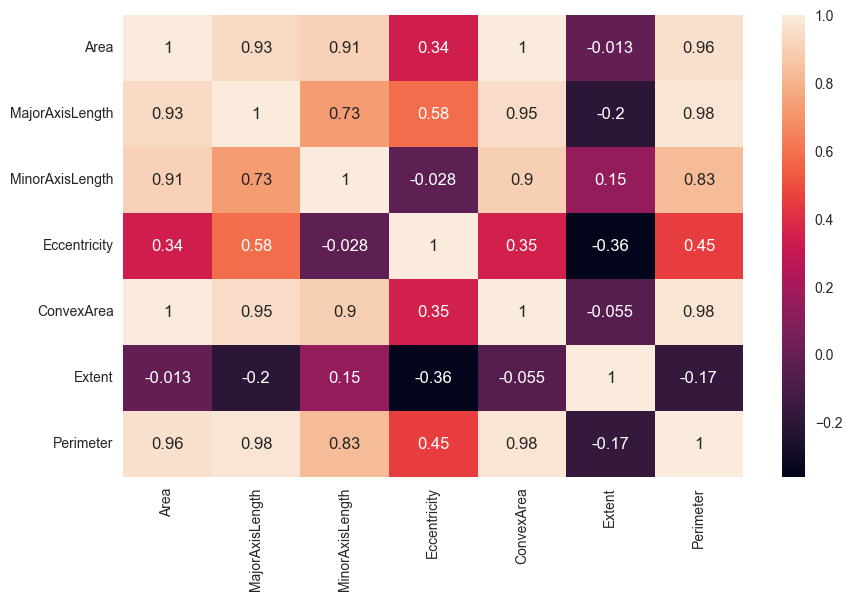

In [59]:
sns.heatmap(df_numeric.corr(), annot=True);

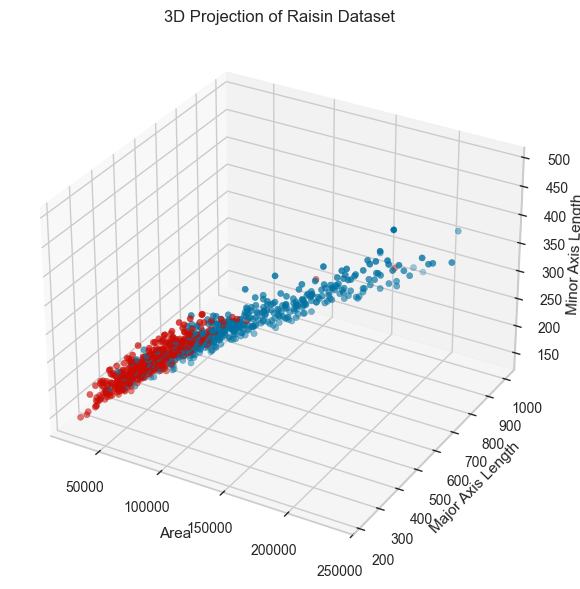

In [60]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the selected features, color by class
ax.scatter(df['Area'], df['MajorAxisLength'], df['MinorAxisLength'], c=df["Class"].map({'Kecimen': 'r', 'Besni': 'b'}), marker='o')

# Set labels for the axes
ax.set_xlabel('Area')
ax.set_ylabel('Major Axis Length')
ax.set_zlabel('Minor Axis Length')

# Title and display the plot
ax.set_title('3D Projection of Raisin Dataset')
plt.show()

In [61]:
import plotly.express as px

colors = df["Class"]  
fig = px.scatter_3d(df,
                    x="Area",
                    y="MajorAxisLength",
                    z="MinorAxisLength",
                    color=colors,
                    )

# Grafiğin boyutlarını artırmak
fig.update_layout(width=1200, height=600)

fig.show()

In [ ]:
y_pred = lgbm_grid.predict(X_test)

lgbm_f1 = f1_score(y_test, y_pred, average='macro')      # or 'weighted'
lgbm_recall = recall_score(y_test, y_pred, average='macro')  # or 'weighted'

eval_metric(lgbm_grid, X_train, y_train, X_test, y_test)

Test_Set
[[14  0  1]
 [ 6  0  0]
 [ 2  0  7]]
              precision    recall  f1-score   support

           0       0.64      0.93      0.76        15
           1       0.00      0.00      0.00         6
           2       0.88      0.78      0.82         9

    accuracy                           0.70        30
   macro avg       0.50      0.57      0.53        30
weighted avg       0.58      0.70      0.63        30


Train_Set
[[62  0  3]
 [20  0  4]
 [ 5  0 22]]
              precision    recall  f1-score   support

           0       0.71      0.95      0.82        65
           1       0.00      0.00      0.00        24
           2       0.76      0.81      0.79        27

    accuracy                           0.72       116
   macro avg       0.49      0.59      0.53       116
weighted avg       0.58      0.72      0.64       116



In [63]:
# Convert the target variable to numeric
df["Class"] = df["Class"].map({"Kecimen":0,"Besni":1}) # Assuming 0 for Kecimen and 1 for Besni

In [64]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,0
1,75166,406.691,243.032,0.802,78789,0.684,1121.786,0
2,90856,442.267,266.328,0.798,93717,0.638,1208.575,0
3,45928,286.541,208.760,0.685,47336,0.700,844.162,0
4,79408,352.191,290.828,0.564,81463,0.793,1073.251,0
...,...,...,...,...,...,...,...,...
895,83248,430.077,247.839,0.817,85839,0.669,1129.072,1
896,87350,440.736,259.293,0.809,90899,0.636,1214.252,1
897,99657,431.707,298.837,0.722,106264,0.741,1292.828,1
898,93523,476.344,254.176,0.846,97653,0.659,1258.548,1


# <font color='green'> <b>Logistic Regression Model</b><font color='black'>

## <font color='blue'> <b>Train | Test Split and Scaling</b><font color='black'>

In [65]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    stratify=y, 
                                                    random_state=42)

# Splitting the data into training and testing sets using the train_test_split function 
# to train the model and make predictions later.

## <font color='blue'> <b>Logistic Regression with Pipeline</b><font color='black'>

In [67]:
log_model = LogisticRegression()

In [68]:
operations = [("scaler", StandardScaler()), ("logistic", log_model)]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [69]:
pipe_model["logistic"].coef_

array([[ 0.57577995,  0.79249039, -0.62335384,  0.15920221,  0.34730361,
        -0.11425574,  1.81716356]])

In [ ]:
y_pred = pipe_model.predict(X_test)
y_pred
# Predicts which classes the test data belongs to.

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1])

In [71]:
confusion_matrix(y_test, y_pred)

# The confusion matrix contains true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN).
# Each cell of the matrix allows for a detailed analysis of the model's performance.

array([[85,  5],
       [ 9, 81]])

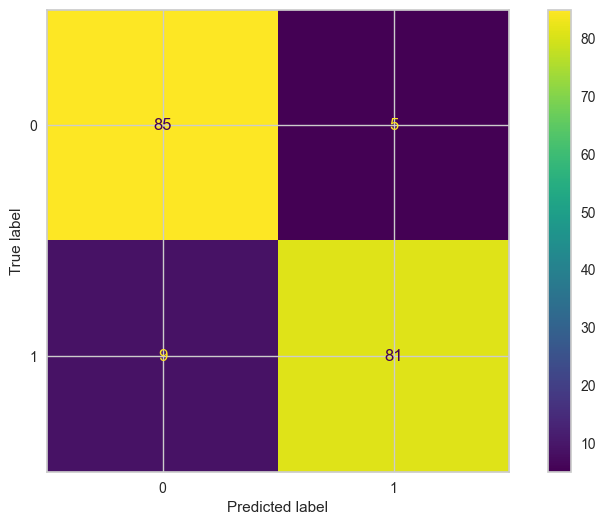

In [72]:
disp = ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test)

plt.show()

In [73]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [74]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[85  5]
 [ 9 81]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        90
           1       0.94      0.90      0.92        90

    accuracy                           0.92       180
   macro avg       0.92      0.92      0.92       180
weighted avg       0.92      0.92      0.92       180


Train_Set
[[318  42]
 [ 61 299]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       360
           1       0.88      0.83      0.85       360

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720



In [75]:
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')

precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')
f1_micro = f1_score(y_test, y_pred, average='micro')

precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

accuracy = accuracy_score(y_test, y_pred)

print("Macro Average Metrics")
print(f"Precision: {precision_macro:.3f}, Recall: {recall_macro:.3f}, F1-score: {f1_macro:.3f}")
print("---")
print("Micro Average Metrics")
print(f"Precision: {precision_micro:.3f}, Recall: {recall_micro:.3f}, F1-score: {f1_micro:.3f}")
print("---")
print("Weighted Average Metrics")
print(f"Precision: {precision_weighted:.3f}, Recall: {recall_weighted:.3f}, F1-score: {f1_weighted:.3f}")
print("---")
print(f"Accuracy: {accuracy:.3f}")

Macro Average Metrics
Precision: 0.923, Recall: 0.922, F1-score: 0.922
---
Micro Average Metrics
Precision: 0.922, Recall: 0.922, F1-score: 0.922
---
Weighted Average Metrics
Precision: 0.923, Recall: 0.922, F1-score: 0.922
---
Accuracy: 0.922


In [76]:
y_pred_proba = pipe_model.predict_proba(X_test)
y_pred_proba
# predict_proba shows the probability of each observation in the test data being assigned to a specific class.
# The first value represents the probability of belonging to class 0, while the second value represents the probability of belonging to class 1.
# The class with the higher value is the one to which the observation is assigned.

array([[5.79899247e-01, 4.20100753e-01],
       [9.36929321e-01, 6.30706794e-02],
       [9.85495761e-01, 1.45042390e-02],
       [6.85017969e-03, 9.93149820e-01],
       [9.48364058e-01, 5.16359424e-02],
       [8.56200441e-03, 9.91437996e-01],
       [8.99340150e-01, 1.00659850e-01],
       [3.23268983e-01, 6.76731017e-01],
       [2.51641714e-01, 7.48358286e-01],
       [1.94332253e-01, 8.05667747e-01],
       [3.37497249e-01, 6.62502751e-01],
       [1.17399699e-01, 8.82600301e-01],
       [2.13368307e-01, 7.86631693e-01],
       [9.57147061e-01, 4.28529388e-02],
       [9.46357229e-01, 5.36427709e-02],
       [3.28028584e-01, 6.71971416e-01],
       [9.95813854e-02, 9.00418615e-01],
       [5.40054865e-01, 4.59945135e-01],
       [9.41650974e-01, 5.83490257e-02],
       [8.93066912e-01, 1.06933088e-01],
       [1.35027421e-01, 8.64972579e-01],
       [8.28085731e-01, 1.71914269e-01],
       [4.28462955e-01, 5.71537045e-01],
       [1.40868321e-01, 8.59131679e-01],
       [3.812563

In [77]:
y_pred_proba_rounded = np.round(y_pred_proba, 2)
y_pred_proba_rounded

array([[0.58, 0.42],
       [0.94, 0.06],
       [0.99, 0.01],
       [0.01, 0.99],
       [0.95, 0.05],
       [0.01, 0.99],
       [0.9 , 0.1 ],
       [0.32, 0.68],
       [0.25, 0.75],
       [0.19, 0.81],
       [0.34, 0.66],
       [0.12, 0.88],
       [0.21, 0.79],
       [0.96, 0.04],
       [0.95, 0.05],
       [0.33, 0.67],
       [0.1 , 0.9 ],
       [0.54, 0.46],
       [0.94, 0.06],
       [0.89, 0.11],
       [0.14, 0.86],
       [0.83, 0.17],
       [0.43, 0.57],
       [0.14, 0.86],
       [0.38, 0.62],
       [0.13, 0.87],
       [0.14, 0.86],
       [0.  , 1.  ],
       [0.03, 0.97],
       [0.39, 0.61],
       [0.36, 0.64],
       [0.17, 0.83],
       [0.93, 0.07],
       [0.63, 0.37],
       [0.82, 0.18],
       [0.43, 0.57],
       [0.92, 0.08],
       [0.91, 0.09],
       [0.87, 0.13],
       [0.29, 0.71],
       [0.9 , 0.1 ],
       [0.67, 0.33],
       [0.96, 0.04],
       [0.98, 0.02],
       [0.9 , 0.1 ],
       [0.91, 0.09],
       [0.98, 0.02],
       [0.8 ,

In [78]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
52,65727,403.194,210.073,0.854,67372,0.617,1030.155,0
187,57741,316.484,234.284,0.672,58976,0.713,906.829,0
251,45598,259.896,225.656,0.496,47266,0.741,813.276,0
687,129292,614.547,270.085,0.898,133475,0.690,1531.744,1
257,43743,300.906,185.851,0.786,44836,0.670,802.261,0
514,166275,602.308,356.236,0.806,168292,0.719,1580.961,1
80,51220,328.648,202.509,0.788,52903,0.692,896.728,0
453,96582,446.705,278.325,0.782,100113,0.707,1216.979,1
873,97494,451.783,278.280,0.788,101878,0.690,1254.755,1
628,105467,465.574,290.202,0.782,109052,0.730,1302.361,1


In [79]:
test_data["pred"] = y_pred
test_data

# test_result aligns with pred_proba (predicted probability values) and pred values.
# While making predictions, the model assigns probabilities of 0.5 and greater to class 1, and probabilities less than 0.5 to class 0.
# Adding the model's predictions as the 'pred' feature to the test_data DataFrame

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred
52,65727,403.194,210.073,0.854,67372,0.617,1030.155,0,0
187,57741,316.484,234.284,0.672,58976,0.713,906.829,0,0
251,45598,259.896,225.656,0.496,47266,0.741,813.276,0,0
687,129292,614.547,270.085,0.898,133475,0.690,1531.744,1,1
257,43743,300.906,185.851,0.786,44836,0.670,802.261,0,0
514,166275,602.308,356.236,0.806,168292,0.719,1580.961,1,1
80,51220,328.648,202.509,0.788,52903,0.692,896.728,0,0
453,96582,446.705,278.325,0.782,100113,0.707,1216.979,1,1
873,97494,451.783,278.280,0.788,101878,0.690,1254.755,1,1
628,105467,465.574,290.202,0.782,109052,0.730,1302.361,1,1


In [81]:
test_data["pred_proba_Kecimen"] = y_pred_proba[:,0]
test_data["pred_proba_Besni"] = y_pred_proba[:,1]
test_data.sample(10)
# And we add the `pred_proba` column/feature to the `test_data` DataFrame, 
# showing the probabilities of belonging to class Kecimen or Besni.

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred,pred_proba_Kecimen,pred_proba_Besni
596,63491,326.633,248.322,0.650,64892,0.734,950.297,1,0,0.922,0.078
315,46403,306.304,196.617,0.767,48631,0.638,843.960,0,0,0.933,0.067
461,64391,449.556,187.122,0.909,68813,0.634,1177.714,1,1,0.218,0.782
151,57980,336.313,222.610,0.750,59311,0.777,925.795,0,0,0.908,0.092
207,61377,339.733,234.024,0.725,64027,0.706,975.553,0,0,0.869,0.131
308,67093,353.110,243.001,0.726,68383,0.761,972.971,0,0,0.873,0.127
306,62835,421.169,191.170,0.891,64406,0.786,1018.553,0,0,0.598,0.402
187,57741,316.484,234.284,0.672,58976,0.713,906.829,0,0,0.937,0.063
149,66568,342.250,249.550,0.684,68078,0.760,993.455,0,0,0.884,0.116
363,103377,460.670,287.993,0.780,105569,0.727,1230.233,0,1,0.290,0.710


## <font color='blue'> <b>Model Performance</b><font color='black'>

In [82]:
accuracy_score(y_test, y_pred)
# Calculates the accuracy rate of the model. 
# Accuracy rate is the ratio of the model's correct predictions to all predictions.

# y_test: Actual class labels
# y_pred: Predicted class labels by the model

0.9222222222222223

In [83]:
precision_score(y_test, y_pred, pos_label=1) # default = pos_label=1
# It shows how many of the predictions for class 1 are correct.
# A precision of 0.1 means the model correctly predicted 10% of its predictions.

0.9418604651162791

In [84]:
precision_score(y_test, y_pred, pos_label=0)

0.9042553191489362

In [85]:
recall_score(y_test, y_pred, pos_label=1)

# By default, it returns the recall_score for class 1.
# It shows how many of the actual positives for class 1 the model correctly predicted.


0.9

In [86]:
recall_score(y_test, y_pred, pos_label=0)
# For the score of the negative class, pos_label=0 should be set.

0.9444444444444444

In [87]:
f1_score(y_test, y_pred, pos_label=1)

0.9204545454545454

In [88]:
f1_score(y_test, y_pred, pos_label=0)

0.9239130434782609

In [89]:
log_loss(y_test, y_pred)
# log_loss measures how much the predicted probabilities deviate from the actual classes.
# The lower the log_loss value, the higher the accuracy of the model's predictions.
# A high log_loss value indicates that the model's predictions are far from the actual classes.

2.803395263598001

## <font color='blue'> <b>Cross Validate</b><font color='black'>

In [90]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

# To make a definitive decision on overfitting/underfitting via cross-validation, set
# return_train_score=True 
# to compare both train and validation set scores in each iteration.

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,0.028,0.035,0.847,0.856,0.838,0.879,0.861,0.827,0.849,0.852
2,0.013,0.016,0.847,0.858,0.838,0.882,0.861,0.827,0.849,0.854
3,0.014,0.019,0.903,0.849,0.914,0.872,0.889,0.818,0.901,0.844
4,0.012,0.013,0.764,0.864,0.828,0.881,0.667,0.843,0.738,0.861
5,0.007,0.013,0.889,0.850,0.967,0.872,0.806,0.821,0.879,0.846
6,0.013,0.017,0.889,0.852,0.967,0.870,0.806,0.827,0.879,0.848
7,0.009,0.013,0.861,0.853,0.825,0.875,0.917,0.824,0.868,0.849
8,0.010,0.012,0.792,0.861,0.784,0.885,0.806,0.830,0.795,0.857
9,0.014,0.028,0.833,0.858,0.853,0.879,0.806,0.830,0.829,0.854
10,0.023,0.025,0.875,0.852,0.865,0.870,0.889,0.827,0.877,0.848


In [91]:
df_scores.mean()[2:]

test_accuracy     0.850
train_accuracy    0.855
test_precision    0.868
train_precision   0.876
test_recall       0.831
train_recall      0.827
test_f1           0.846
train_f1          0.851
dtype: float64

## <font color='blue'> <b>GridSearchCV</b><font color='black'>

In [ ]:
# pipeline for logistic regression
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(max_iter=5000))]

model = Pipeline(steps=operations)

In [92]:
# Define the hyperparameter grid
penalty = ["l1", "l2"]  # l1: Lasso, l2: Ridge
C = np.logspace(-1, 5, 20)  # Regularization strength values

param_grid = [
    {
        "logistic__penalty": ["l1"],
        "logistic__C": C,
        "logistic__solver": ["liblinear", "saga"]
    },
    {
        "logistic__penalty": ["l2"],
        "logistic__C": C,
        "logistic__solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
    },
    {
        "logistic__penalty": ["elasticnet"],
        "logistic__C": C,
        "logistic__solver": ["saga"],
        "logistic__l1_ratio": np.linspace(0, 1, 10)  #  Adding l1_ratio for ElasticNet
    },
    {
        "logistic__penalty": ["none"],
        "logistic__solver": ["newton-cg", "lbfgs", "sag", "saga"]
    }
]

In [94]:
grid_model = GridSearchCV(estimator=model, 
                          param_grid=param_grid, 
                          cv = 10,
                          scoring='accuracy',
                          return_train_score=True)

grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             param_grid=[{'logistic__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+...
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                          'logistic__l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                          'logistic__penalty': ['elasticnet'],
                          'logistic__solver': ['saga']},
                         {'logistic__penalty': ['none'],
                          'logistic__solver': ['newton-cg', 'lbfgs', 'sag',
                                               'saga']}],
             return_train_score=True, scoring='accuracy')

In [95]:
y_pred = grid_model.predict(X_test)

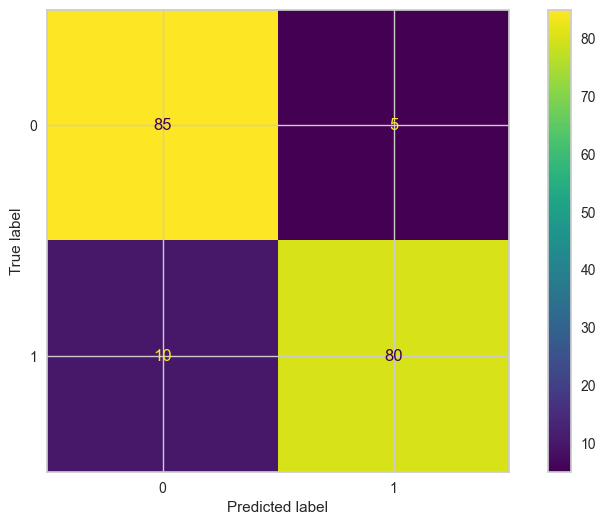

In [96]:
y_pred = ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test)
plt.show()

In [97]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[85  5]
 [10 80]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        90
           1       0.94      0.89      0.91        90

    accuracy                           0.92       180
   macro avg       0.92      0.92      0.92       180
weighted avg       0.92      0.92      0.92       180


Train_Set
[[317  43]
 [ 63 297]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       360
           1       0.87      0.82      0.85       360

    accuracy                           0.85       720
   macro avg       0.85      0.85      0.85       720
weighted avg       0.85      0.85      0.85       720



## <font color='blue'> <b>Precision-Recall Curve & ROC (Receiver Operating Curve) and AUC (Area Under Curve)</b><font color='black'>

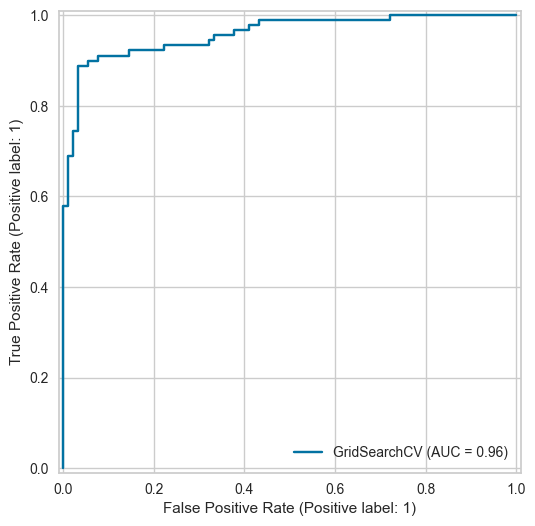

In [ ]:
RocCurveDisplay.from_estimator(grid_model, X_test, y_test)
plt.show()
# Model is 96% successful in distinguishing the Kecioren and Besni class.

In [99]:
roc_auc_score(y_test,y_pred_proba[:,1])

np.float64(0.9590123456790124)

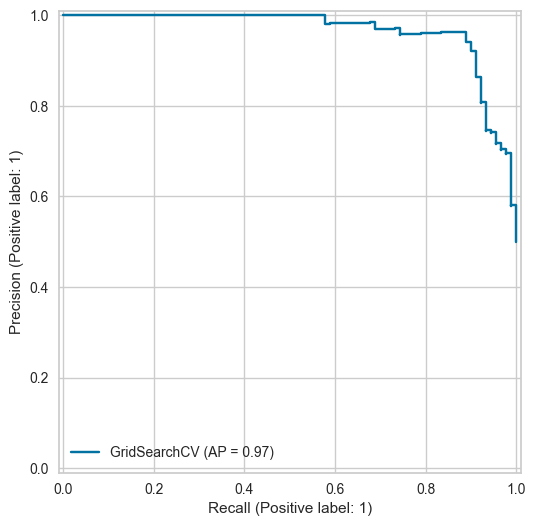

In [100]:
PrecisionRecallDisplay.from_estimator(grid_model, X_test,y_test)
plt.show()

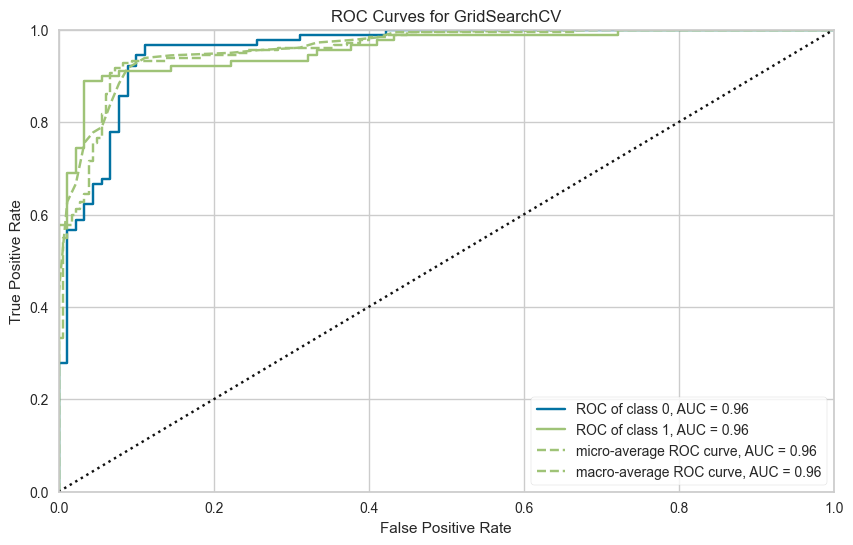

In [101]:
model = grid_model
visualizer = ROCAUC(model)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();

In [102]:
average_precision_score(y_test,y_pred_proba[:,1])

np.float64(0.9665026794393317)

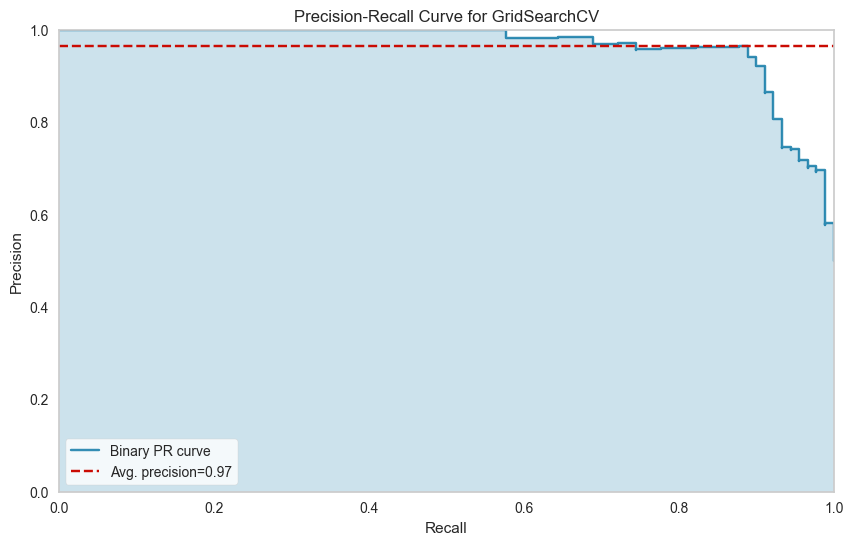

In [103]:
model = grid_model
viz = PrecisionRecallCurve(
    model,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

# <font color='green'> <b>Prediction</b><font color='black'>

In [105]:
final_model = LogisticRegression()

final_pipe_model = Pipeline([("scaler", StandardScaler()), ("logistic", final_model)])

In [106]:
final_pipe_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [ ]:
my_dict = {
    "Area": [87524, 75166, 90856, 45928, 79408],
    "MajorAxisLength": [442.246011, 406.690687, 442.267048, 286.540559, 352.190770],
    "MinorAxisLength": [253.291155, 243.032436, 266.328318, 208.760042, 290.827533],
    "Eccentricity": [0.819738, 0.801805, 0.798354, 0.684989, 0.564011],
    "ConvexArea": [90546, 78789, 93717, 47336, 81463],
    "Extent": [0.758651, 0.684130, 0.637613, 0.699599, 0.792772],
    "Perimeter": [1184.040, 1121.786, 1208.575, 844.162, 1073.251],
}

In [108]:
sample = pd.DataFrame(my_dict)
sample

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246,253.291,0.820,90546,0.759,1184.040
1,75166,406.691,243.032,0.802,78789,0.684,1121.786
2,90856,442.267,266.328,0.798,93717,0.638,1208.575
3,45928,286.541,208.760,0.685,47336,0.700,844.162
4,79408,352.191,290.828,0.564,81463,0.793,1073.251


In [109]:
# Make predictions
predictions = final_pipe_model.predict(sample)
predictions_proba = final_pipe_model.predict_proba(sample)

In [112]:
pd.DataFrame(predictions_proba)

,0,1
0,0.348,0.652
1,0.511,0.489
2,0.275,0.725
3,0.968,0.032
4,0.888,0.112
